In [ ]:
# Instructions for data:
# Upload the dataset in the files-directory (see left hand-side). Data is in shared google drive.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cancer_data = pd.read_csv('cancer-data.csv')

In [ ]:
cancer_data

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


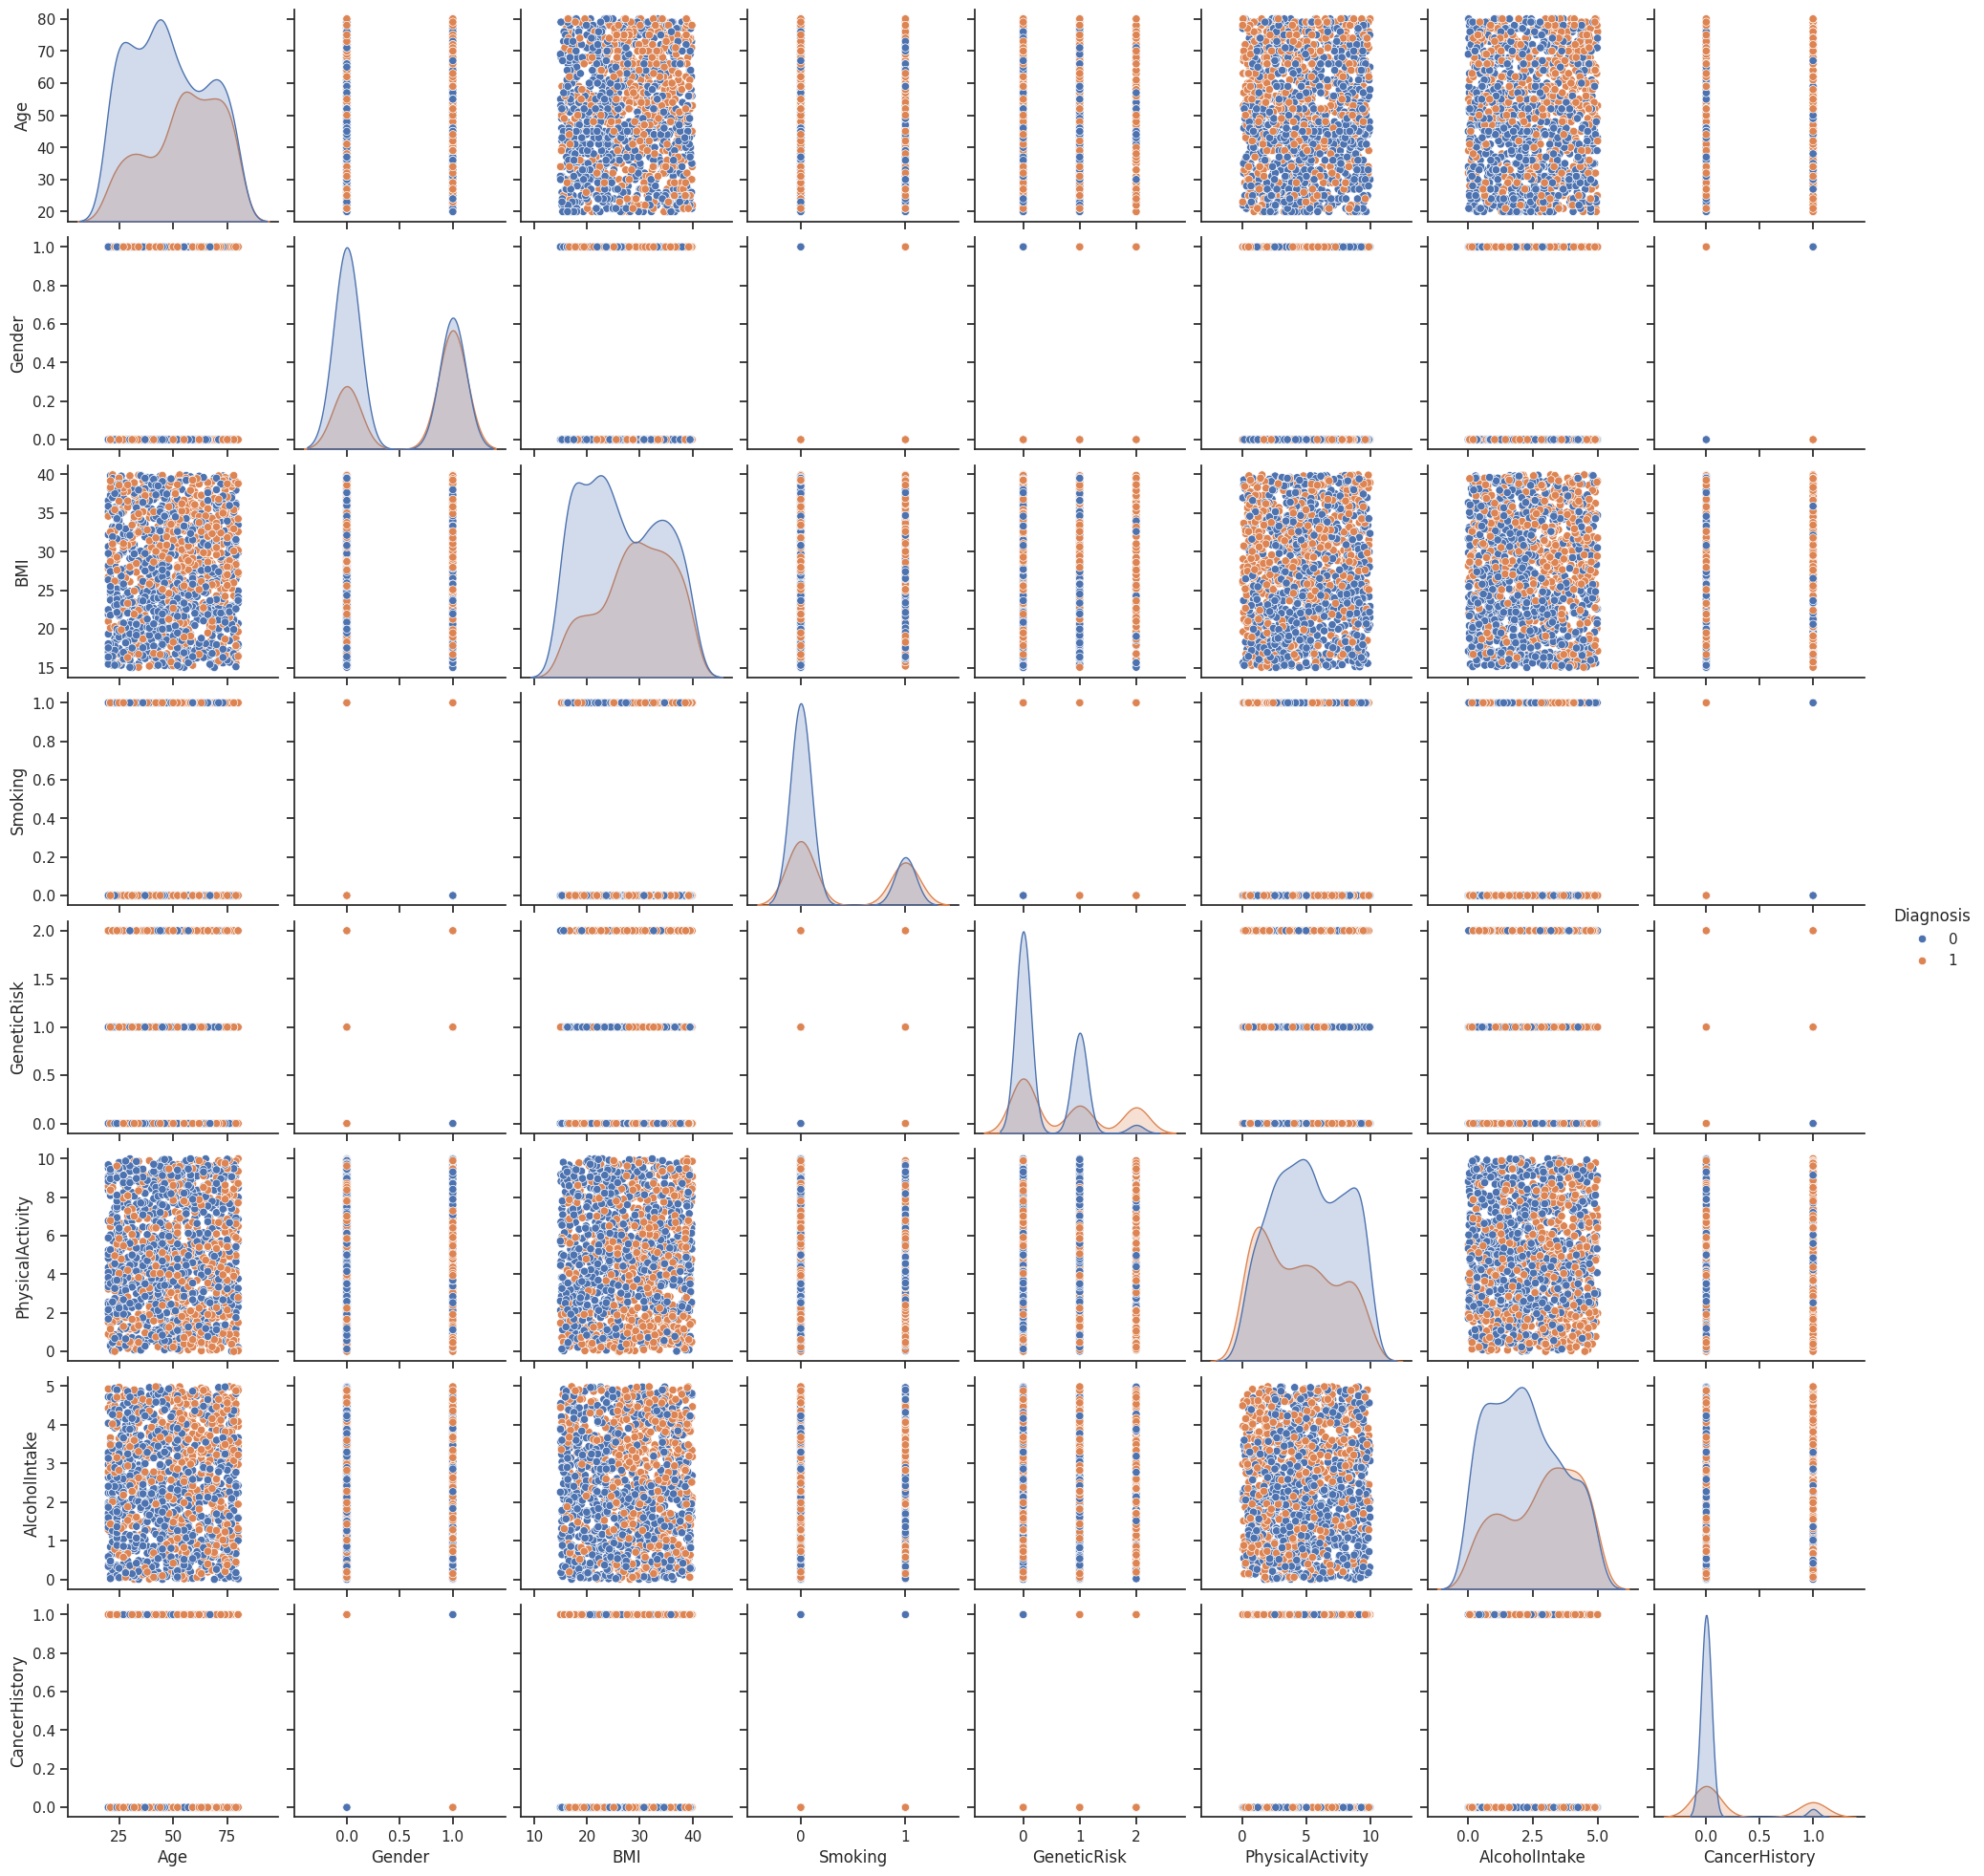

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(cancer_data, hue='Diagnosis')

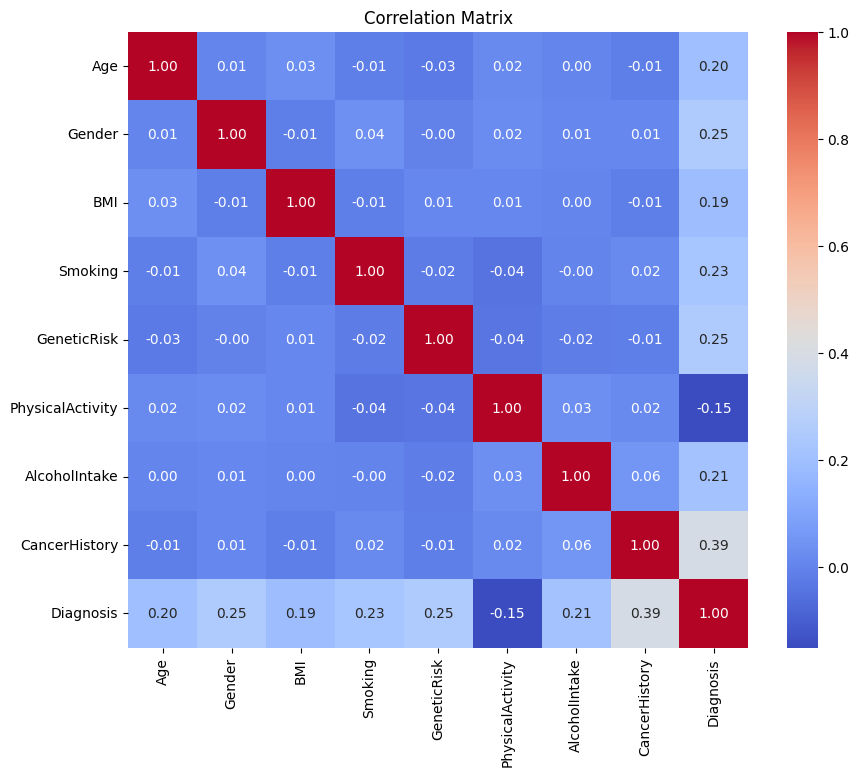

In [ ]:
corr_matrix = cancer_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('cor-matrix.png', bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
columns = cancer_data.columns.tolist()
columns.remove('Diagnosis')
columns.remove('Gender') # remove because it's binary
columns.remove('CancerHistory')
columns.remove('Smoking')

columns

['Age', 'BMI', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake']

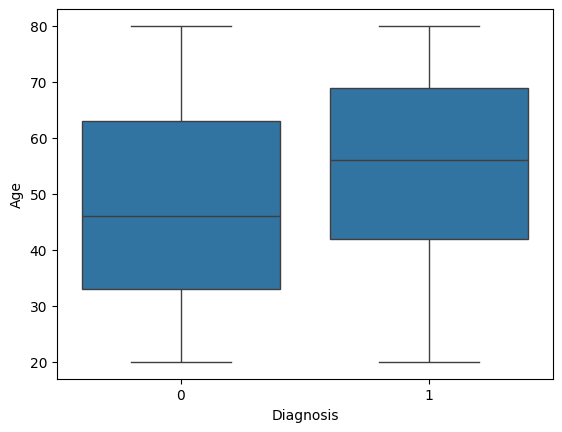

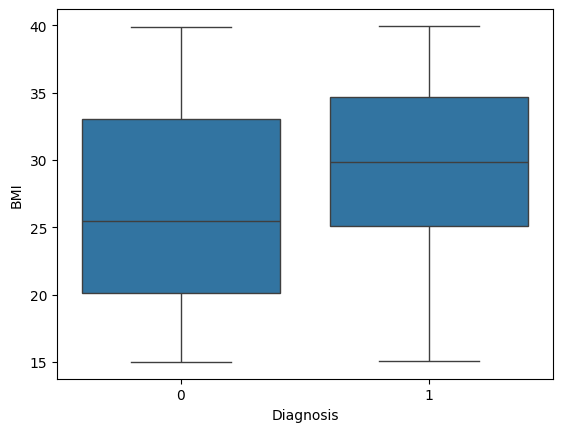

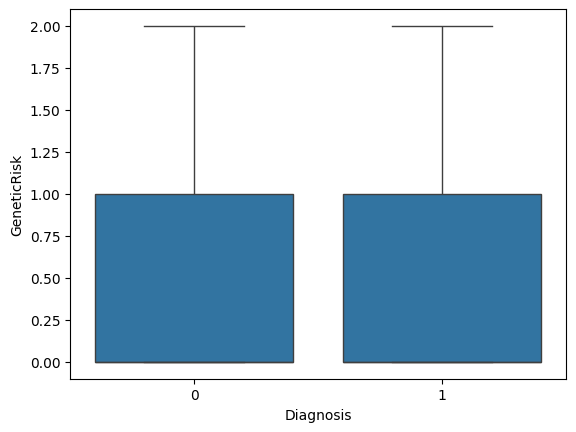

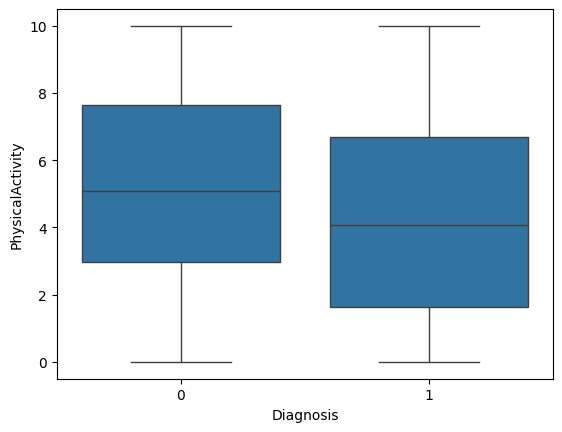

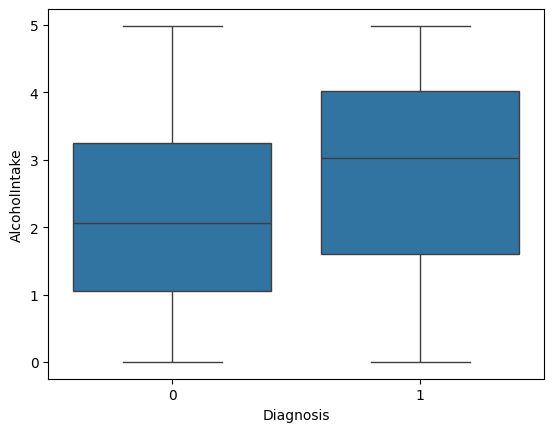

In [ ]:
c = 0
for predictor in columns:
    plt.figure()
    sns.boxplot(x='Diagnosis', y=predictor, data=cancer_data)
    plt.savefig(f'box-plot-{c}.png', bbox_inches='tight', transparent=True)
    plt.show()
    c += 1

In [ ]:
(cancer_data['Diagnosis'].value_counts())

Diagnosis
0    943
1    557
Name: count, dtype: int64

In [ ]:
cancer_data.value_counts()

Age  Gender  BMI        Smoking  GeneticRisk  PhysicalActivity  AlcoholIntake  CancerHistory  Diagnosis
20   0       15.438809  0        1            3.831645          0.338982       0              0            1
60   0       34.855267  0        0            0.388129          4.781106       0              1            1
     1       28.241493  0        0            1.914896          3.959805       0              1            1
             26.536937  1        0            7.621875          4.396022       0              1            1
             24.477351  0        0            7.712248          3.031083       0              0            1
                                                                                                          ..
41   0       36.764461  0        0            7.068036          1.249795       0              0            1
             34.349784  0        2            9.324440          2.355863       0              0            1
             30.596483  

In [ ]:
cancer_data['GeneticRisk']

0       1
1       1
2       2
3       0
4       0
       ..
1495    0
1496    1
1497    1
1498    0
1499    0
Name: GeneticRisk, Length: 1500, dtype: int64

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#define X
X = cancer_data.drop('Diagnosis', axis=1)
y = cancer_data['Diagnosis']

#scaling to solve ITERATION LIMIT WARNING
scaler = StandardScaler()
X[['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']] = scaler.fit_transform(X[['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']])

#define Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test set is 20%


# Model 1: Logistic regression

### 1.1 Fit model + print test and training error rates

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score,roc_auc_score, roc_curve, auc


#initialize regression model
log_reg = LogisticRegression()

#train model
log_reg.fit(X_train, y_train)

#predictions
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)

train_error_rate = 1 - accuracy_score(y_train, y_train_pred_log_reg)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred_log_reg)

print(f'\n\nTraining Error Rate: {train_error_rate:.4f}')
print(f'Test Error Rate: {test_error_rate:.4f}\n\n')


roc_auc = roc_auc_score(y_test, y_test_pred_log_reg)

print('mean accuracy:',log_reg.score(X_test, y_test_pred_log_reg))
print( 'accuracy score:', accuracy_score(y_test, y_test_pred_log_reg))
print('roc_auc_score:', roc_auc)

print(cancer_data.columns)
print(log_reg.coef_, log_reg.intercept_)



Training Error Rate: 0.1533
Test Error Rate: 0.1400


mean accuracy: 1.0
accuracy score: 0.86
roc_auc_score: 0.8396739130434783
Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')
[[ 0.80769437  1.78313481  0.80126089  1.77122618  1.3940985  -0.66557879
   0.77512062  3.65927724]] [-3.52854992]


### 1.2 Generate predictions + prediction probabillities

In [ ]:
log_reg_preds_proba = log_reg.predict_proba(X_test)
log_reg_preds = log_reg.predict(X_test)

### 1.3 Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, log_reg_preds))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       184
           1       0.87      0.75      0.81       116

    accuracy                           0.86       300
   macro avg       0.86      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300



### 1.4 Confusion matrix

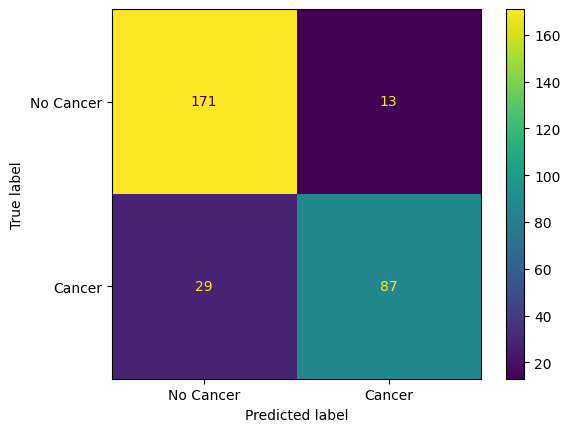

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import savefig

cm = confusion_matrix(y_test, log_reg_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])

disp.plot()
plt.savefig('demo.png', bbox_inches='tight', transparent=True)
plt.show()

### 1.5 RoC curve (possibly plot all curves for all models in one?)

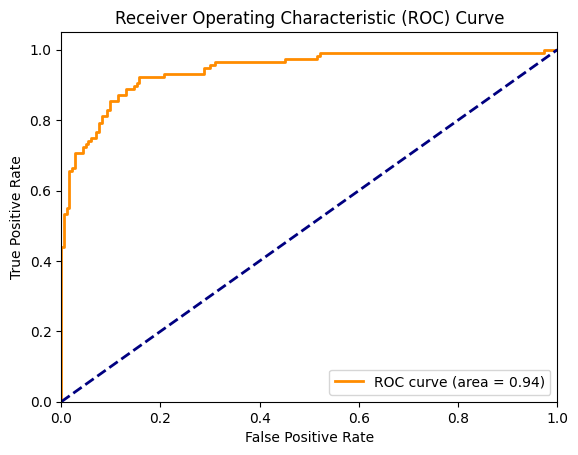

In [ ]:
#fpr = false positive rate
#tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, log_reg_preds_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
savefig('demo-1.png', transparent=True)
plt.show()

# Model 2: Linear Discriminant Analysis




In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

#Fit LDA to the training data
lda.fit(X_train, y_train)

#predictions
y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)
y_pred_lda_proba = lda.predict_proba(X_test)


# Evaluate the model's performance
accuracy_lda = accuracy_score(y_test, y_test_pred_lda)
report_lda = classification_report(y_test, y_test_pred_lda)

train_error_rate = 1 - accuracy_score(y_train, y_train_pred_lda)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred_lda)

print(f'\n\nTraining Error Rate: {train_error_rate:.4f}')
print(f'Test Error Rate: {test_error_rate:.4f}\n\n')

roc_auc = roc_auc_score(y_test, y_test_pred_lda)

print('accuracy score:', accuracy_score(y_test, y_test_pred_lda))
print('roc_auc_score:', roc_auc)

# Print the results
print("Accuracy:", accuracy_lda)
print("Classification Report:\n", report_lda)



Training Error Rate: 0.1525
Test Error Rate: 0.1400


accuracy score: 0.86
roc_auc_score: 0.8396739130434783
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       184
           1       0.87      0.75      0.81       116

    accuracy                           0.86       300
   macro avg       0.86      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300



code to check if covariance matrix is common

In [ ]:

import numpy as np
from scipy.stats import chi2


data_combined = X.copy()
data_combined['Diagnosis'] = y

# Function to calculate Box's M test
def box_m_test(data, group_col):
    groups = data[group_col].unique()
    n_groups = len(groups)
    n_features = data.shape[1] - 1

    # Calculate the covariance matrices and pooled covariance matrix
    cov_matrices = []
    n_samples = []
    for group in groups:
        group_data = data[data[group_col] == group].drop(columns=group_col)
        cov_matrix = np.cov(group_data, rowvar=False)
        cov_matrices.append(cov_matrix)
        n_samples.append(len(group_data))

    pooled_cov_matrix = sum([(n_samples[i] - 1) * cov_matrices[i] for i in range(n_groups)]) / (sum(n_samples) - n_groups)

    # Calculate M statistic
    log_dets = np.log([np.linalg.det(cov_matrices[i]) for i in range(n_groups)])
    log_det_pooled = np.log(np.linalg.det(pooled_cov_matrix))
    M = (sum(n_samples) - n_groups) * log_det_pooled - sum([(n_samples[i] - 1) * log_dets[i] for i in range(n_groups)])

    # Correction factor
    c = (2 * n_features**2 + 3 * n_features - 1) * (1 / (sum(n_samples) - n_groups) - sum([1 / (n_samples[i] - 1) for i in range(n_groups)])) / 6
    M_c = M * (1 - c)

    # Degrees of freedom
    df = (n_groups - 1) * n_features * (n_features + 1) / 2

    # p-value
    p_value = 1 - chi2.cdf(M_c, df)

    return M_c, p_value

# Perform Box's M test
M_c, p_value = box_m_test(data_combined, 'Diagnosis')

# Display the result with p-value up to 2 decimal points
print(f"Box's M statistic: {M_c:.2f}")
print(f"p-value: {p_value:.2f}")
print('p value is lower than 0.05, indicating covariance matrix is not common')

Box's M statistic: 829.77
p-value: 0.00
p value is lower than 0.05, indicating covariance matrix is not common


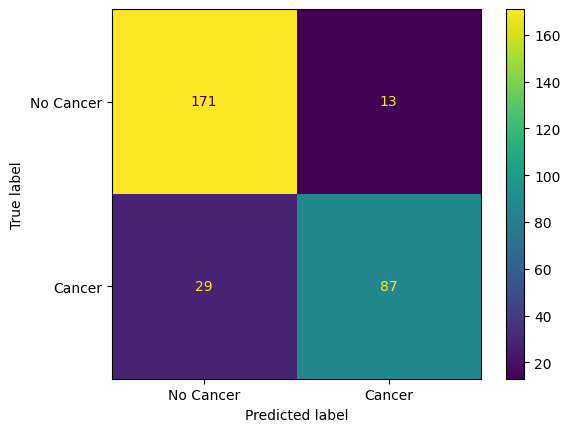

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_lda)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])

disp.plot()
plt.savefig('demo.png', bbox_inches='tight', transparent=True)
plt.show()

NameError: name 'savefig' is not defined

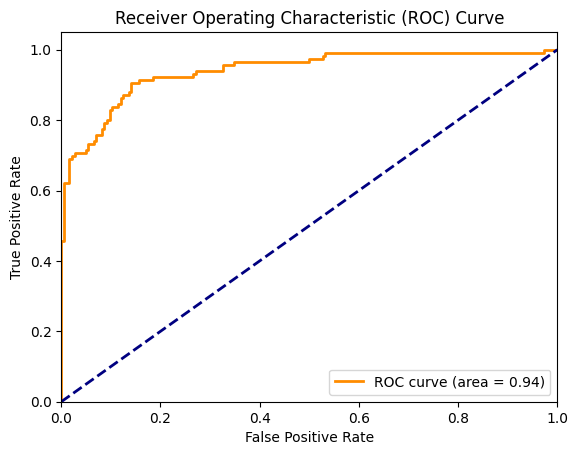

In [ ]:
#fpr = false positive rate
#tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
savefig('demo-2.png', transparent=True)
plt.show()

# Quadratic Discriminant Analysis


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)


#predictions
y_train_pred_qda = qda.predict(X_train)
y_test_pred_qda = qda.predict(X_test)
y_pred_qda_proba = qda.predict_proba(X_test)


# Evaluate the model's performance
accuracy_qda = accuracy_score(y_test, y_test_pred_qda)
report_qda = classification_report(y_test, y_test_pred_qda)

train_error_rate = 1 - accuracy_score(y_train, y_train_pred_qda)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred_qda)

print(f'\n\nTraining Error Rate: {train_error_rate:.4f}')
print(f'Test Error Rate: {test_error_rate:.4f}\n\n')

roc_auc = roc_auc_score(y_test, y_test_pred_qda)

print('accuracy score:', accuracy_score(y_test, y_test_pred_qda))
print('roc_auc_score:', roc_auc)

# Print the results
print("Accuracy:", accuracy_qda)
print("Classification Report:\n", report_qda)



Training Error Rate: 0.1533
Test Error Rate: 0.1467


accuracy score: 0.8533333333333334
roc_auc_score: 0.8326461769115443
Accuracy: 0.8533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89       184
           1       0.86      0.74      0.80       116

    accuracy                           0.85       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.85      0.85      0.85       300



roc curve - QDA


NameError: name 'savefig' is not defined

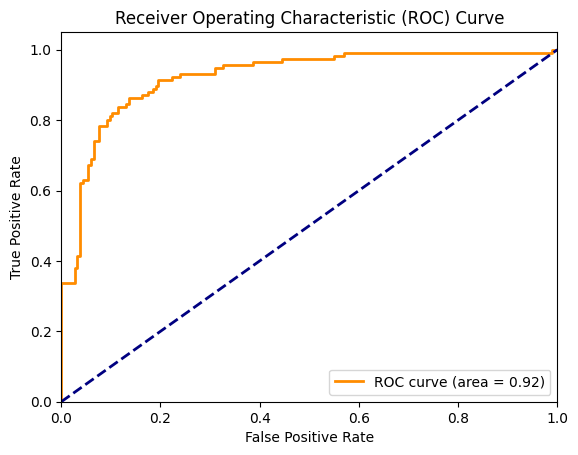

In [ ]:

#fpr = false positive rate
#tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_qda_proba[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
savefig('demo-2.png', transparent=True)
plt.show()



Confusion Matrix - QDA


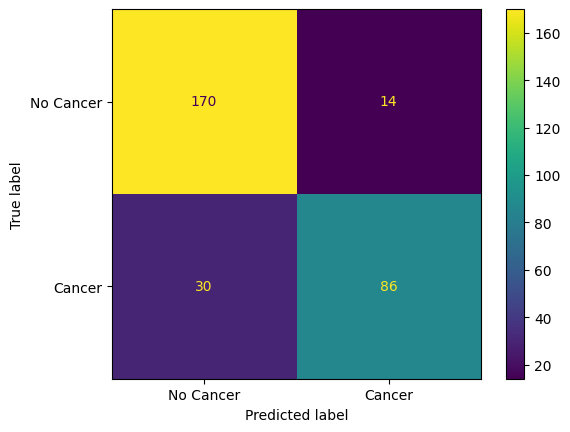

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_qda)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])

disp.plot()
plt.savefig('demo.png', bbox_inches='tight', transparent=True)
plt.show()

# Model 3: KNN


### 3.1 Test different values for K and print their respective test and training errors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_error_rates = []
test_error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    knn_train_preds = knn.predict(X_train)
    knn_test_preds = knn.predict(X_test)

    knn_train_error_rate = 1 - accuracy_score(y_train, knn_train_preds)
    knn_test_error_rate = 1 - accuracy_score(y_test, knn_test_preds)

    train_error_rates.append(knn_train_error_rate)
    test_error_rates.append(knn_test_error_rate)

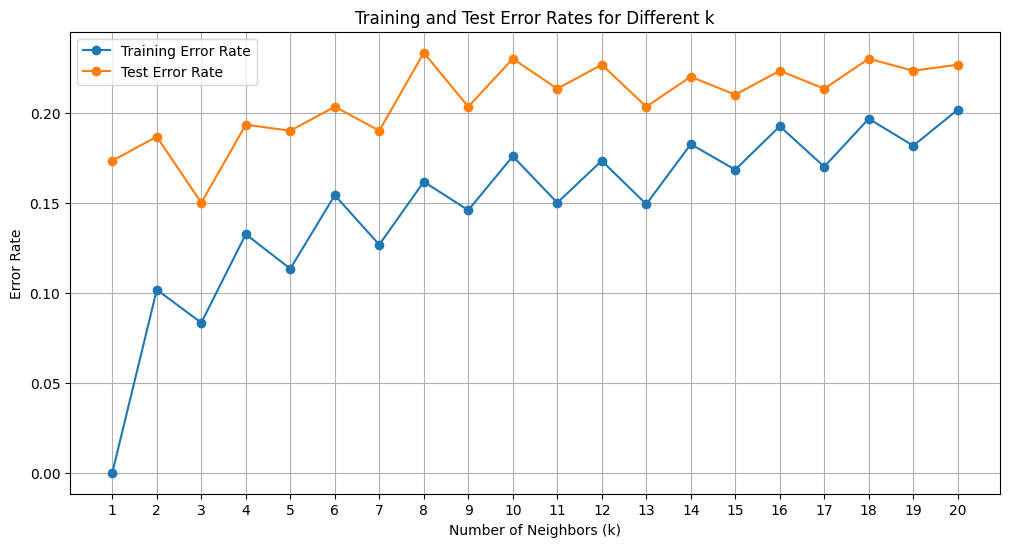

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), train_error_rates, label='Training Error Rate', marker='o')
plt.plot(range(1, 21), test_error_rates, label='Test Error Rate', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Training and Test Error Rates for Different k')
plt.legend()
plt.xticks(range(1, 21))
savefig('demo-2.png', transparent=True)
plt.grid(True)
plt.show()

### 3.2 Fit model + print test and training error

In [ ]:
#initialize knn model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

#train model
knn.fit(X_train, y_train)

#predictions
knn_y_train_pred = knn.predict(X_train)
knn_y_test_pred = knn.predict(X_test)

knn_train_error_rate = 1 - accuracy_score(y_train, knn_y_train_pred)
knn_test_error_rate = 1 - accuracy_score(y_test, knn_y_test_pred)

print(f'\n\nTraining Error Rate: {knn_train_error_rate:.4f}')
print(f'Test Error Rate: {knn_test_error_rate:.4f}\n\n')



Training Error Rate: 0.1133
Test Error Rate: 0.1900




### 3.3 Generate predictions + prediction probabillities

In [ ]:
knn_preds_proba = knn.predict_proba(X_test)
knn_preds = knn.predict(X_test)

### 3.4 Generate classification report

In [ ]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       184
           1       0.82      0.65      0.72       116

    accuracy                           0.81       300
   macro avg       0.81      0.78      0.79       300
weighted avg       0.81      0.81      0.80       300



### 3.5 RoC Curve

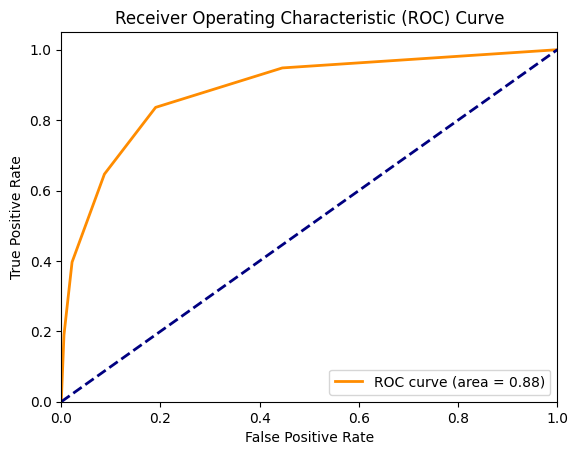

In [ ]:
#fpr = false positive rate
#tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test, knn_preds_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
savefig('demo-3.png', transparent=True)
plt.show()

### 3.6 Confusion matrix

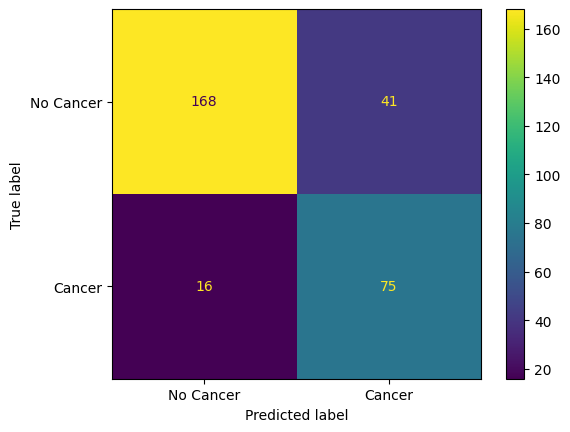

In [ ]:
cm = confusion_matrix(knn_preds, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])

disp.plot()
savefig('demo-4.png', transparent=True)
plt.show()